In [37]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Generate RT distributions from activation and noise

First, let's code ACT-R's function that relates a memory's activation and its response time:

$ RT = T_{ER} + F \times \mathrm{e}^{-f A} $

In [5]:
def responsetime(activation, ter=1, F=1, f=1):
    return ter + F * np.exp(-f * activation)

## Encoding the role of noise

In ACT-R, RTs are a deterministic function of activation, but activation is, in itself, a probabilistic function. The probability of a chunk being selected is determined by the noise parameter $s$, which is distributed according to a logistic distribution.

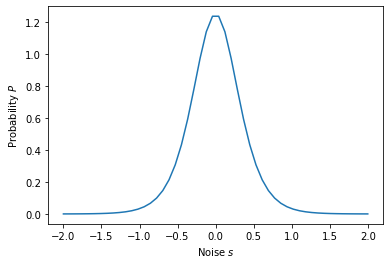

In [34]:
noise = np.linspace(-2, 2)
dist = sp.stats.logistic(0, 0.2)
plt.plot(noise, dist.pdf(noise))
plt.xlabel("Noise $s$")
plt.ylabel("Probability $P$")
plt.show()

## The relationship between noise and RTs

The above graph means that the a chunk can take an activation value of $A - s$ with probability $P(S)$ (the y-axies of the graph above).

For each value of

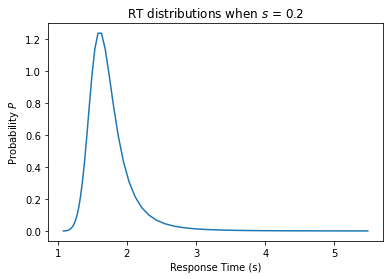

In [35]:
rts = [responsetime(0.5 - x) for x in noise]
plt.plot(rts, dist.pdf(noise))
plt.xlabel("Response Time (s)")
plt.ylabel("Probability $P$")
plt.title("RT distributions when $s$ = 0.2")
plt.show()

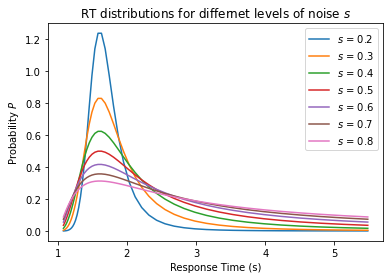

In [36]:
for s in np.linspace(0.2, 0.8, 7):
    dist = sp.stats.logistic(0, s)
    rts = [responsetime(0.5 - x) for x in noise]
    plt.plot(rts, dist.pdf(noise))
plt.legend(["$s$ = %.1f" % (x,) for x in np.linspace(0.2, 0.8, 7)])
plt.xlabel("Response Time (s)")
plt.ylabel("Probability $P$")
plt.title("RT distributions for differnet levels of noise $s$")
plt.show()